In [1]:
#Downloading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Downloading the data set
data = pd.read_csv(r'/Users/venkateshiyersubramanian/Desktop/audit_risk.csv', index_col=False)
data.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


In [3]:
#Converting data in to a dataframe and checking for missing values..
df = pd.DataFrame(data)
len(df)- df.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
# replacing na values in Money_Value column with the median, Only one value need to be replaced.
median_value=df['Money_Value'].median()
df['Money_Value']=df['Money_Value'].fillna(median_value)

In [5]:
len(df)- df.count()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

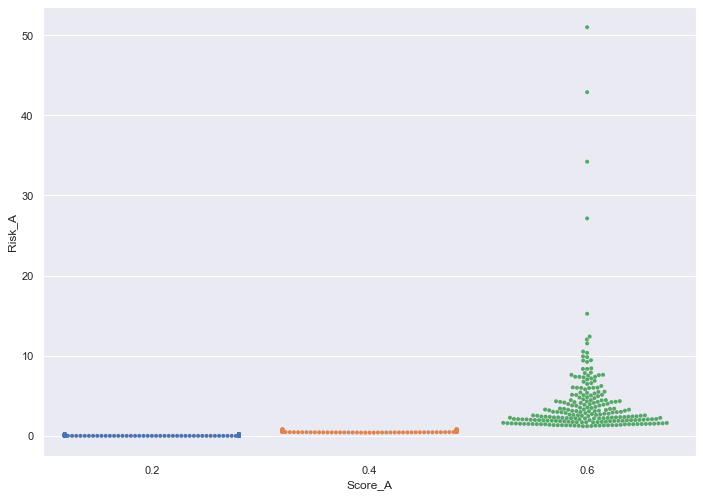

In [6]:
#Checking the score and risk for category A and we observe that the maximum risk is allocated to a score of 0.6
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='Score_A', y='Risk_A', data=df, size = 4)

0    471
1    305
Name: Risk, dtype: int64


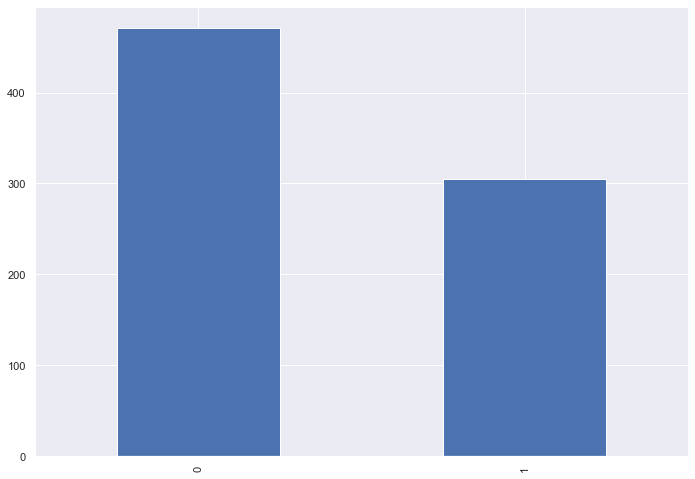

In [7]:
#Checking the Risk variable distribution, we can clearly see that the '0's' are  60% out of the total population
#denoting no risk for 60% of the data
dfo = df
dfo = df['Risk'].value_counts().plot(kind='bar')
print(df['Risk'].value_counts())

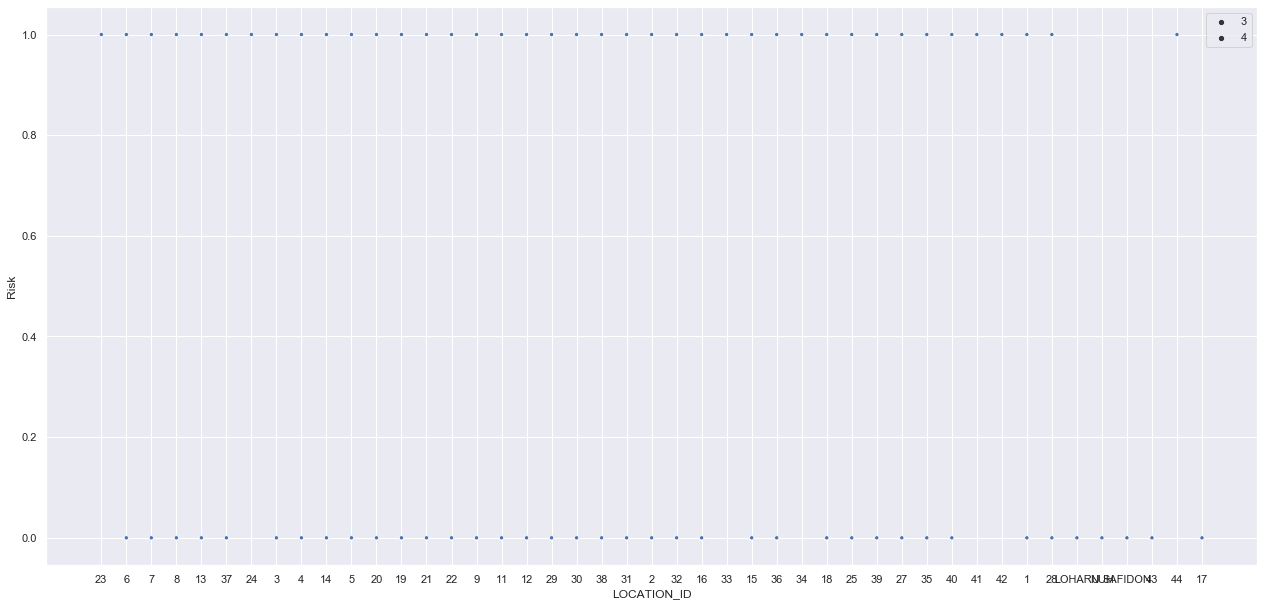

In [8]:
#We can see that Location_ID has three values which are textual, we need to convert them in to numerical value
sns.set(rc={'figure.figsize':(21.7,10.27)})
countryplot = sns.scatterplot(x='LOCATION_ID', y='Risk', data=df, size = 4)

In [8]:
#Checking on the unique textual info in the Location_ID column, we can see there are three string values in the 
#numeric column:
print(df.LOCATION_ID.unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


In [9]:
#Since there only three individual values in Location_ID column which are textual we will replace it with the median
#of the column
df["LOCATION_ID"]=df["LOCATION_ID"].replace("LOHARU", 23)
df["LOCATION_ID"]=df["LOCATION_ID"].replace("NUH", 23)
df["LOCATION_ID"]=df["LOCATION_ID"].replace("SAFIDON", 23)

In [10]:
print(df.LOCATION_ID.unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 23 '43' '44' '17']


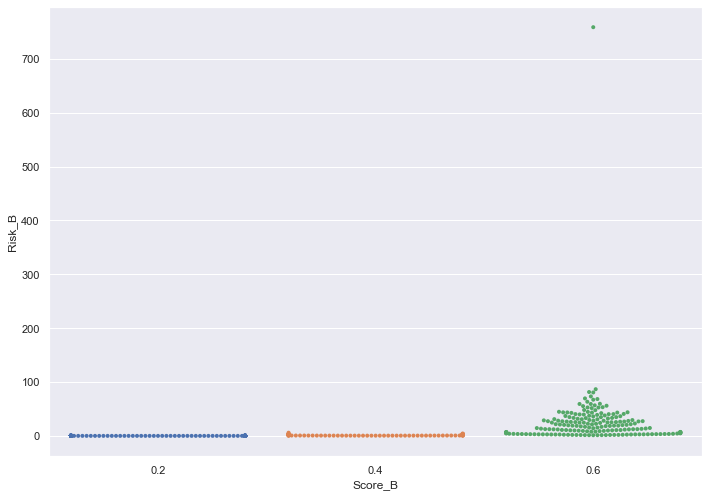

In [223]:
#Checking the score and risk for category B and we observe that the maximum risk is allocated to a score of 0.6
sns.set(rc={'figure.figsize':(11.7,8.27)})
agebplot = sns.swarmplot(x='Score_B', y='Risk_B', data=df, size = 4)

In [224]:
df['RISk_E'] = df.index

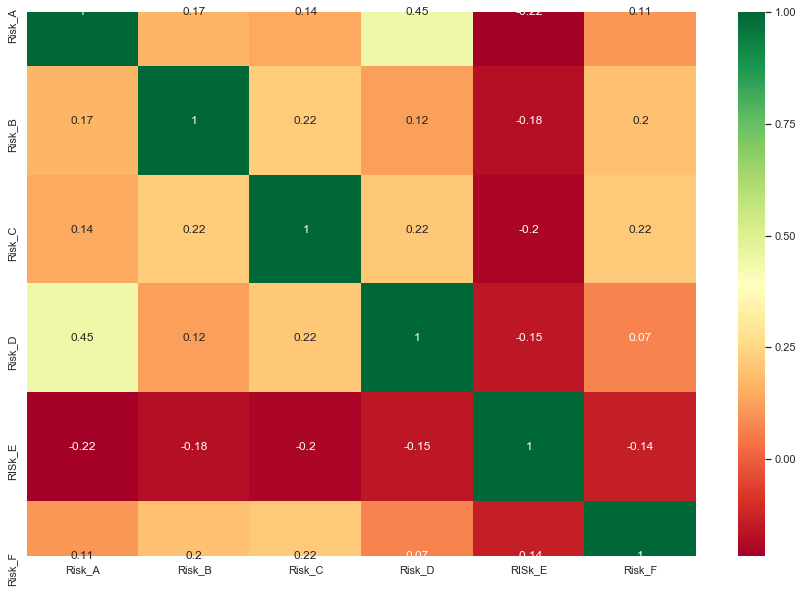

In [225]:
#get correlations of column A to F in dataset
df_corr = df[['Risk_A','Risk_B','Risk_C', 
                    'Risk_D', 'RISk_E', 'Risk_F']]
corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
# #plot heat map
g=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#We can see that the only correlation that is moderate enough is between Risk_A and Risk_D;
#It's a linear positive correlation 

In [226]:
df['CONTROL_Risk'] = df.index

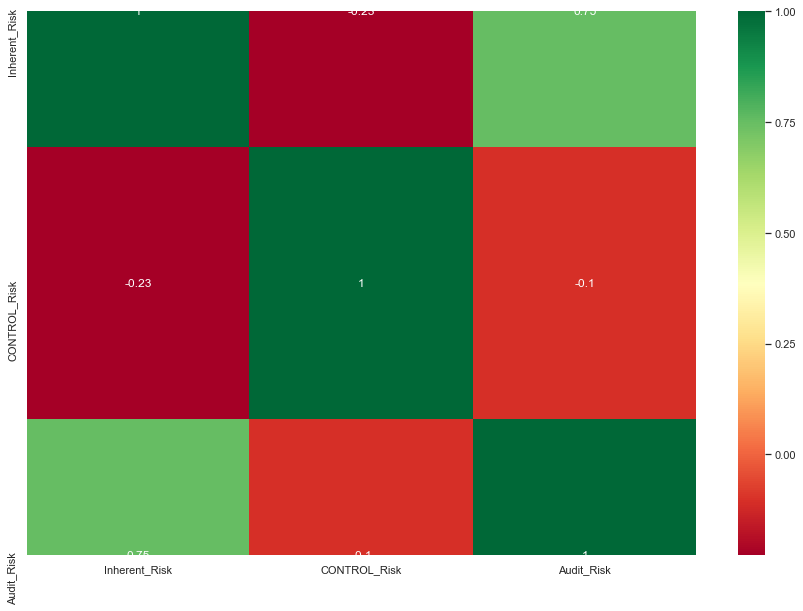

In [227]:
df_corr1 = df[['Inherent_Risk','CONTROL_Risk', 
                    'Audit_Risk']]
corrmat = df_corr1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
# #plot heat map
g=sns.heatmap(df_corr1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#PLEASE NOTE THAT WE HAVE NOT TAKEN DETECTION RISK INTO CONSIDERATION AS ALL IT'S VALUES ARE SET AS DEFAULT TO 0.5
#THERE IS A STRONG LINEAR POSITIVE CORRELATION BETWEEN INHERENT RISK AND AUDIT RISK

In [228]:
#Generate a hypothesis based on avg of Control_Risk column & Risk_E column:
#H0 = The avg of Control_Risk column is equal to the avg of the numbers in Risk_E column
#H1= The avg of Control_Risk column is not at all equal to the avg of the numbers in Risk_E column
dfcr_m = np.mean(df['CONTROL_Risk'])
dfcr_sd = np.std(df['CONTROL_Risk'])
dfre_m = np.mean(df['RISk_E'])
dfre_sd = np.std(df['RISk_E'])

In [229]:
#Conducting a t-test on two independent samples
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=dfcr_m, std1=dfcr_sd, nobs1=776,
                      mean2=dfre_m, std2=dfre_sd, nobs2=776, equal_var = False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [230]:
#Based on the above p value >0.05 we fail to reject our null hypothesis which states that the avg of Control_Risk
# is almost equal to the avg of Risk_E column
#Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect 
#exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist.
#Although prima facie I would assume that the effect does not exist but with a small sample size such as this
# Due to the sample size it could be possible to have inadequate statistical power to capture the effect.

In [231]:
#Conducting an ANOVA Test for Inherent,Control & Audit Risk:
df1 = df['Inherent_Risk']
df2 = df['CONTROL_Risk']
df3 = df['Audit_Risk']

In [232]:
print('df1')
print(df1.describe())
print('df2')
print(df2.describe())
print('df3')
print(df3.describe())

df1
count    776.000000
mean      17.680612
std       54.740244
min        1.400000
25%        1.583500
50%        2.214000
75%       10.663500
max      801.262000
Name: Inherent_Risk, dtype: float64
df2
count    776.000000
mean     387.500000
std      224.156196
min        0.000000
25%      193.750000
50%      387.500000
75%      581.250000
max      775.000000
Name: CONTROL_Risk, dtype: float64
df3
count    776.000000
mean       7.168158
std       38.667494
min        0.280000
25%        0.316700
50%        0.555600
75%        3.249900
max      961.514400
Name: Audit_Risk, dtype: float64


In [233]:
#H0= All the three forms of risk are related to each other
#Test of normality/variance criteria:
#The assumptions for implementing one way ANOVA include-
#The normality criterion: each group compared should come from a population following the normal distribution.
#The variance criterion (or 'homogeneity of variances'): samples should come from populations with the same variance.
#Independent samples: performance (the dependent variable) in each sample should not be affected by the conditions
#in other samples.
import scipy.stats as stats
# Shapiro-Wilk normality test 
stats.shapiro(df1), stats.shapiro(df2), stats.shapiro(df3)

((0.2829322814941406, 0.0),
 (0.9547806978225708, 1.0444016189533299e-14),
 (0.13376456499099731, 0.0))

In [234]:
#Df2's p value is greater than threshold a = 0.05, therefore we "fail to reject" the null hypothesis 
#(conclusion: samples come from populations that follow normal distribution).

In [11]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [12]:
dffinal = df.copy()

In [13]:
#Converting Location_ID & Money_Value in to float as they both are showing up as objects
dffinal['LOCATION_ID']=dffinal['LOCATION_ID'].astype(float)

In [14]:
dffinal['Money_Value'] = pd.to_numeric(dffinal['Money_Value'], errors='coerce')

In [15]:
for i in range(len(dffinal['Money_Value'])):
    dffinal['Money_Value'][i]=float(dffinal['Money_Value'][i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
#Split dataset in features and target variable
X=dffinal.ix[:,(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)]
y =dffinal.ix[:,(26)]

In [17]:
#Importing train test splits
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
X.dtypes

Sector_score      float64
LOCATION_ID       float64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
dtype: object

In [19]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logreg = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial').fit(X, y)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Classification report
#The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta 
#score reaches its best value at 1 and worst score at 0.
#The support is the number of occurrences of each class in y_test.
#Predicting the accuracy of the logit regression on the test set:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.98      0.98      0.98        55

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [21]:
#Linear SVM Model Fitting:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=0, tol=1e-5)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=1e-05, verbose=False)

In [22]:
y_pred = svclassifier.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9871794871794872
[[100   1]
 [  1  54]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.98      0.98      0.98        55

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [23]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [25]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [27]:
#GBM algorithm  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import mean_squared_error
xgb = GradientBoostingClassifier()

In [28]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
y_pred=xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


LR: 0.990976 (0.011666)
clf: 0.997436 (0.005128)
DT: 1.000000 (0.000000)
GB: 1.000000 (0.000000)
SVM: 0.922244 (0.153041)


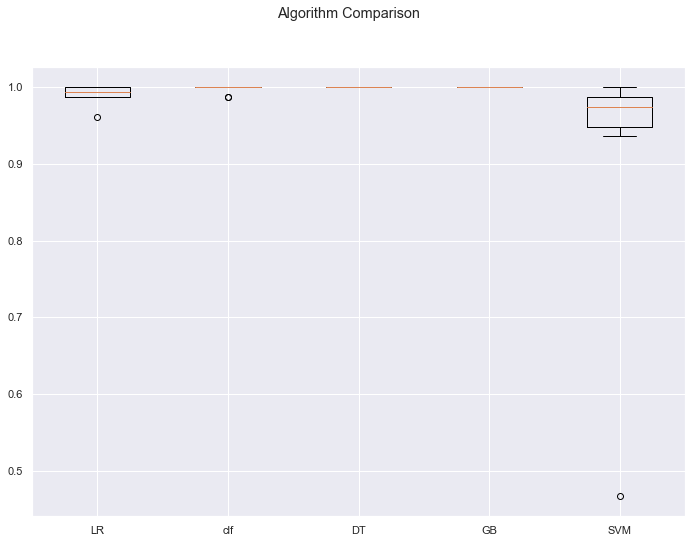

In [30]:
# Comparing models
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('clf', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#As we can see that our best two models are Decision Tree & Gradient Boost

In [32]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


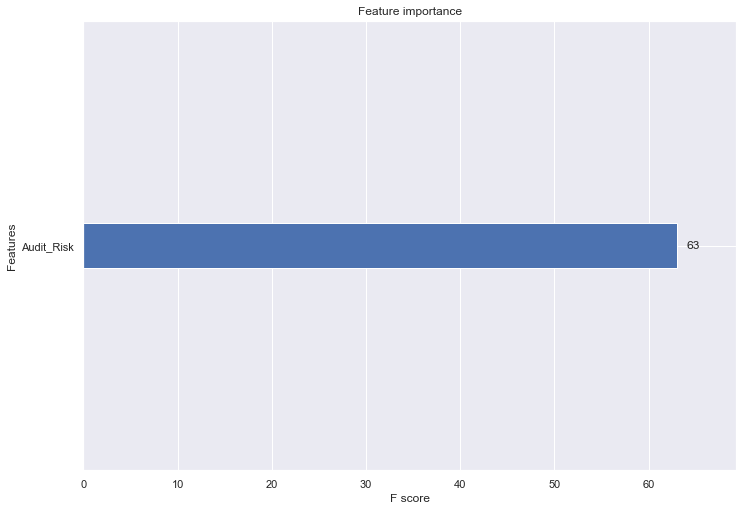

In [33]:
# plot feature importance using built-in function for GB
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()
#We can see that the most important feature impacting the model is Audit_Risk